EE399 HW1

Shaunak Bhide

GITHUB: https://github.com/gitbheeds


In [1]:
#import begin
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
#import end

[ 2.17175315  0.90932519  0.73248809 31.45278269]
1.5927258504240172


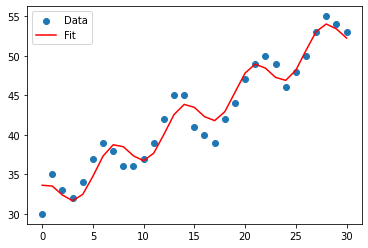

In [2]:
#Consider the following data from the class
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

#Fit the data to the following model with least squared error
#model of form f(x) = Acos(Bx)+Cx+D
def model (C, x) :
    
    #model 
    f_x =  C[0] * np.cos(C[1]*x) + C[2]*x + C[3]

    return f_x

def loss_func(C, x, y):
    return np.sqrt(np.sum((y - model(C, x))**2)/(len(y)))

#initial parameter guesses
c0 = np.array([5, np.pi/6, 12, 30])

result = opt.minimize(loss_func, c0, args=(X, Y), method = 'Nelder-Mead')

c_opt = result.x


# Print the optimal parameters
print(c_opt)
print(loss_func(c_opt, X, Y))

# Plot the results
plt.scatter(X, Y, label='Data')
plt.plot(X, model(c_opt, X), 'r-', label='Fit')
plt.legend()
plt.show()

In [3]:
#parameters to sweep through
Aval = np.linspace(0, 3, 3000)
Bval = np.linspace(-3, 3, 3000)
Cval = np.linspace(-0.5, 2, 3000)
Dval = np.linspace(0, 30, 3000)


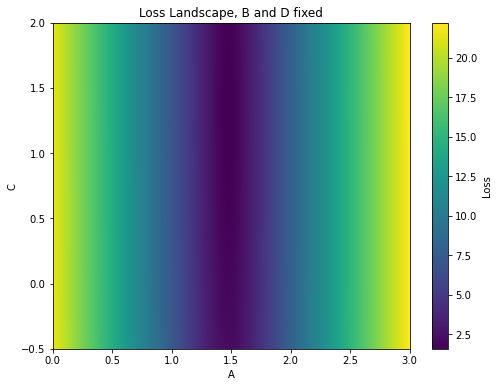

In [15]:

#fix B and D, sweep through A and C
loss_grid = np.zeros((len(Aval), len(Cval)))

#sweep A and C
for i, A in enumerate(Aval):
    for j, C in enumerate(Cval):
        loss = loss_func([A, c_opt[1], C, c_opt[3]], X, Y)
#store the loss value for the given combination of A and C sweeps
        loss_grid[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Aval, Cval, loss_grid, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('A')
plt.ylabel('C')
plt.title('Loss Landscape, B and D fixed')
plt.show()

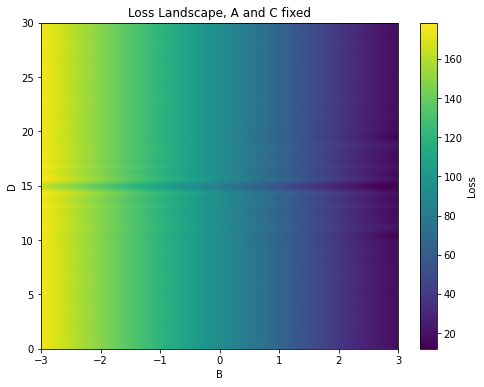

In [5]:
#fix A and C, sweep through B and D
loss_grid1 = np.zeros((len(Bval), len(Dval)))

#sweep A and C
for i, B in enumerate(Bval):
    for j, D in enumerate(Dval):
        loss = loss_func([c_opt[0], B, c_opt[2], D], X, Y)
#store the loss value for the given combination of B and D sweeps
        loss_grid1[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Bval, Dval, loss_grid1, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('B')
plt.ylabel('D')
plt.title('Loss Landscape, A and C fixed')
plt.show()

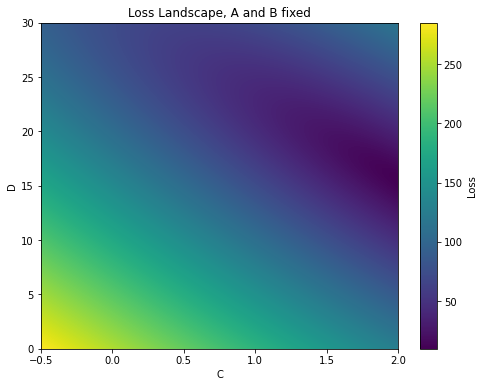

In [6]:
#fix A and B, sweep through C and D
loss_grid1 = np.zeros((len(Cval), len(Dval)))

#sweep C and D
for i, C in enumerate(Cval):
    for j, D in enumerate(Dval):
        loss = loss_func([c_opt[0], c_opt[1], C, D], X, Y)
#store the loss value for the given combination of C and D sweeps
        loss_grid1[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Cval, Dval, loss_grid1, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('C')
plt.ylabel('D')
plt.title('Loss Landscape, A and B fixed')
plt.show()

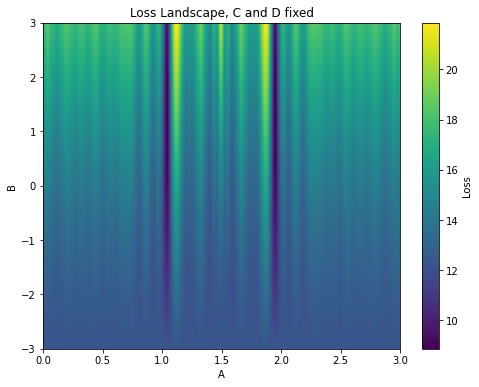

In [7]:
#fix C and D, sweep through A and B
loss_grid1 = np.zeros((len(Aval), len(Bval)))

#sweep A and B
for i, A in enumerate(Aval):
    for j, B in enumerate(Bval):
        loss = loss_func([A, B, c_opt[2], c_opt[3]], X, Y)
#store the loss value for the given combination of C and D sweeps
        loss_grid1[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Aval, Bval, loss_grid1, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Loss Landscape, C and D fixed')
plt.show()

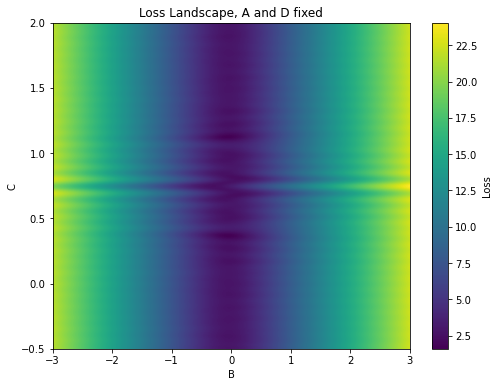

In [6]:
#fix A and D, sweep through B and C
loss_grid1 = np.zeros((len(Bval), len(Cval)))

#sweep B and C
for i, B in enumerate(Bval):
    for j, C in enumerate(Cval):
        loss = loss_func([c_opt[0], B, C, c_opt[3]], X, Y)
#store the loss value for the given combination of B and C sweeps
        loss_grid1[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Bval, Cval, loss_grid1, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('B')
plt.ylabel('C')
plt.title('Loss Landscape, A and D fixed')
plt.show()

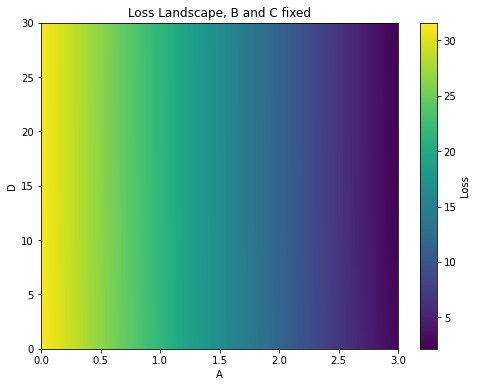

In [7]:
#fix B and C, sweep through A and D
loss_grid1 = np.zeros((len(Aval), len(Dval)))

#sweep A and D
for i, A in enumerate(Aval):
    for j, D in enumerate(Dval):
        loss = loss_func([A, c_opt[1], c_opt[2], D], X, Y)
#store the loss value for the given combination of A and D sweeps
        loss_grid1[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Aval, Dval, loss_grid1, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('A')
plt.ylabel('D')
plt.title('Loss Landscape, B and C fixed')
plt.show() 

Using the first 20 data points as training data, fit a line, parabola and 19th degree
polynomial to the data. Compute the least-square error for each of these over the training
points. Then compute the least square error of these models on the test data which are
the remaining 10 data points.

In [9]:
#training and test data
trainingX = X[:20]
trainingY = Y[:20]
testX = X[-10:]
testY = Y[-10:]

In [10]:
#model definitions

def line(C, x) :
    return C[0]*x + C[1]

def parabola(C, x) :
    return (C[0]*x)**2 + C[1]*x + C[2]

polynomial_fit = np.polyfit(trainingX, trainingY, 19)


def loss_func_line(C, x, y):

    return np.sqrt(np.sum((y - line(C, x))**2)/len(y))

def loss_func_par(C, x, y) : 

    return np.sqrt(np.sum((y - parabola(C, x))**2)/len(y))

    
def loss_func_poly(x, y) :

    return  np.sqrt(np.sum((np.polyval(polynomial_fit, x) - y)**2) / len(y))



c:\Users\spbhi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
c_l = [1, 1]

c_p = [1, 1, 1]



result_line = opt.minimize(loss_func_line, c_l, args=(trainingX, trainingY), method = 'Nelder-Mead')

c_lo = result_line.x


result_par = opt.minimize(loss_func_par, c_p, args=(trainingX, trainingY), method = 'Nelder-Mead')

c_po = result_par.x


#Display results of loss function
loss_line = loss_func_line(c_lo, trainingX, trainingY)

loss_par = loss_func_par(c_po, trainingX, trainingY)

#this one generates coefficients internally, operates different to the other two models
loss_poly = loss_func_poly(trainingX, trainingY)

#test data
loss_line_t = loss_func_line(c_lo, testX, testY)

loss_par_t = loss_func_par(c_po, testX, testY)

loss_poly_t = loss_func_poly(testX, testY)

print("Training Data Loss functions \n")
print(" Loss function from line fit ", loss_line, "\n",
      "Loss function from parabola fit ", loss_par, "\n",
      "Loss function from polynomial fit ", loss_poly, "\n")

print("Test Data Loss functions \n")
print(" Loss function from line fit ", loss_line_t, "\n",
      "Loss function from parabola fit ", loss_par_t, "\n",
      "Loss function from polynomial fit ", loss_poly_t)


Training Data Loss functions 

 Loss function from line fit  2.242749387090776 
 Loss function from parabola fit  2.2427493872531716 
 Loss function from polynomial fit  0.028351970844281614 

Test Data Loss functions 

 Loss function from line fit  3.4392167768613793 
 Loss function from parabola fit  3.4391905006921237 
 Loss function from polynomial fit  30022321415.023407


In [13]:
trainingX1 = X[:10] + X[-10:]
trainingY1 = Y[:10] + Y[-10:]

testX1 = X[10:21]
testY1 = Y[10:21]




result_line = opt.minimize(loss_func_line, c_l, args=(trainingX1, trainingY1), method = 'Nelder-Mead')

c_lo = result_line.x


result_par = opt.minimize(loss_func_par, c_p, args=(trainingX1, trainingY1), method = 'Nelder-Mead')

c_po = result_par.x



#Display results of loss function
loss_line = loss_func_line(c_lo, trainingX1, trainingY1)

loss_par = loss_func_par(c_po, trainingX1, trainingY1)

loss_poly = loss_func_poly(trainingX1, trainingY1)

#test data
loss_line_t = loss_func_line(c_lo, testX1, testY1)

loss_par_t = loss_func_par(c_po, testX1, testY1)

loss_poly_t = loss_func_poly(testX1, testY1)
print("Training Data Loss functions \n")
print(" Loss function from line fit ", loss_line, "\n",
      "Loss function from parabola fit ", loss_par, "\n",
      "Loss function from polynomial fit ", loss_poly, "\n")

print("Test Data Loss functions \n")
print(" Loss function from line fit ", loss_line_t, "\n",
      "Loss function from parabola fit ", loss_par_t, "\n",
      "Loss function from polynomial fit ", loss_poly_t, "\n")

print("This is worse than the original training data and test data")

Training Data Loss functions 

 Loss function from line fit  3.1615109544610585 
 Loss function from parabola fit  3.1636135157981684 
 Loss function from polynomial fit  34471695091300.21 

Test Data Loss functions 

 Loss function from line fit  33.573133901279796 
 Loss function from parabola fit  34.011683144193 
 Loss function from polynomial fit  4027.9343692981083 

This is worse than the original training data and test data
